<a href="https://colab.research.google.com/github/agulhane090398/PythonViz/blob/main/AeroFit_CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aerofit

*Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.*



```
● Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills,
exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.
● The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the
company, to provide a better recommendation of the treadmills to new customers. The team decides to investigate whether there are differences
across the product with respect to customer characteristics.
● Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
● Construct two-way contingency tables for each AeroFit treadmill product and compute all conditional and marginal probabilities and their
insights/impact on the business.
```



**1. Import the dataset and do usual data analysis steps like checking the structure &
characteristics of the dataset**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, poisson,expon, geom
import math
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df=pd.read_csv('/content/drive/MyDrive/BussinessCases/aerofit_treadmill.csv')

In [6]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [7]:
df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [9]:
df.shape

(180, 9)

In [10]:
df.isnull().any()

Product          False
Age              False
Gender           False
Education        False
MaritalStatus    False
Usage            False
Fitness          False
Income           False
Miles            False
dtype: bool

In [11]:
df[df['Gender']=='Male'].count()

Product          104
Age              104
Gender           104
Education        104
MaritalStatus    104
Usage            104
Fitness          104
Income           104
Miles            104
dtype: int64



```
Observations :

1. TWe have 180 rows and 9 columns and There are no missing values in the data.
2. There are 3 unique products in the dataset.
3. KP281 is the most frequent product.
4. Minimum & Maximum age of the person is 18 & 50, mean is 28.79 and 75% of persons have age less than or equal to 33.
5. Most of the people are having 16 years of education i.e., 75% of persons are having education <= 16 years.
6. Out of 180 data points, 104's gender is Male and rest are the female.
7. Standard deviation for Income & Miles is very high. These variables might have the outliers in it.
```



**2. Detect Outliers**



```
#Univariate Analysis:
Understanding the distribution of the data for the quan1taƟ the aƩributes:
1. Age
2. Education
3. Usage
4. Fitness
5. Income
6. Miles
```



<Axes: xlabel='Miles', ylabel='Count'>

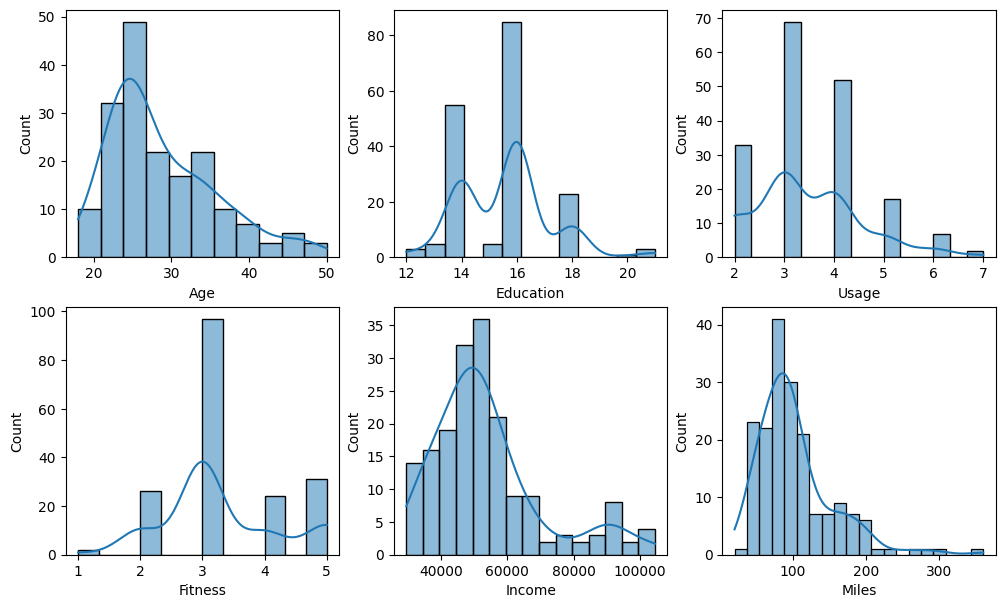

In [12]:
fig , axis = plt.subplots(nrows=2, ncols=3, figsize=(12,5))
fig.subplots_adjust(top=1.2)

sns.histplot(data=df, x='Age', kde=True, ax=axis[0,0])
sns.histplot(data=df, x='Education', kde=True, ax=axis[0,1])
sns.histplot(data=df, x='Usage', kde=True, ax=axis[0,2])
sns.histplot(data=df, x='Fitness', kde=True, ax=axis[1,0])
sns.histplot(data=df, x='Income', kde=True, ax=axis[1,1])
sns.histplot(data=df, x='Miles', kde=True, ax=axis[1,2])



```
Observations:
From the KDE plot it is quite clear that:
1. Age and Miles are having Right skew normal distribution.
2. Education,  Usage, Fitness and Income shows multi model distribution.
3. Age plot clearly says that maximum purchase is made by customer with age between 20 and 30.
4. Income plot shows that most of customer has salary range between 40000 to 60000.
5. On an average customer run/walk 90 to 100 miles per week.
```



In [13]:
df['log_age']=df['Age'].apply(lambda x : math.log(x,10))
df['log_miles']=df['Miles'].apply(lambda x : math.log(x,10))

<Axes: xlabel='log_miles', ylabel='Count'>

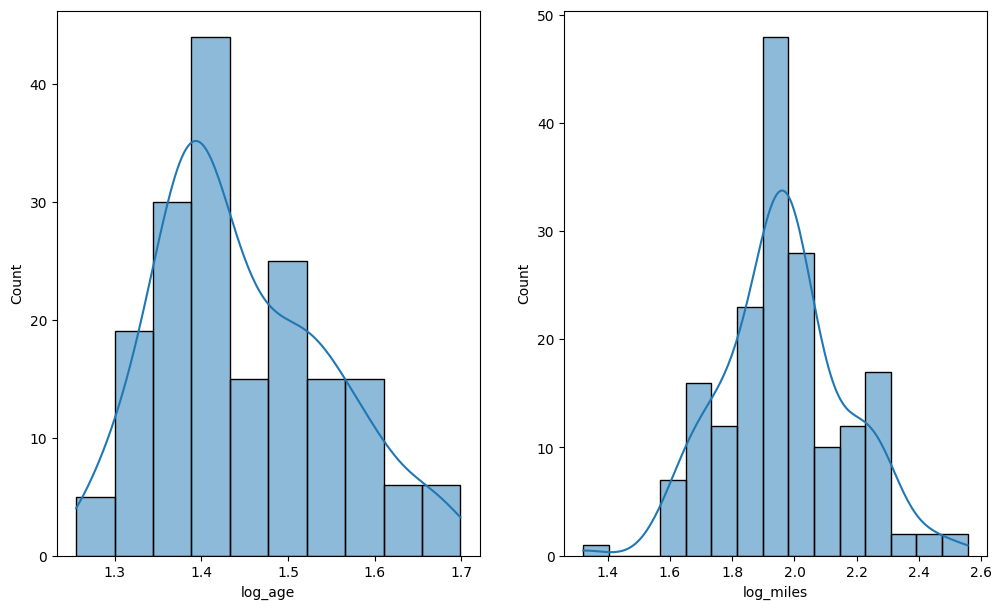

In [14]:
fig , axis = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
fig.subplots_adjust(top=1.2)

sns.histplot(data=df, x='log_age', kde=True, ax=axis[0])
sns.histplot(data=df, x='log_miles', kde=True, ax=axis[1])

**Outliers detection using BoxPlots**

<Axes: xlabel='Miles'>

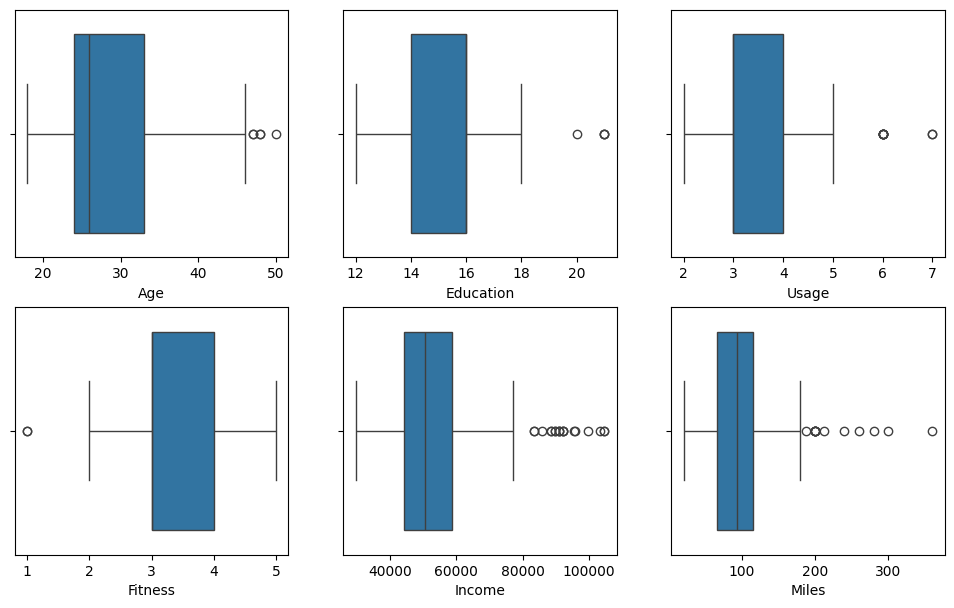

In [15]:
fig , axis = plt.subplots(nrows=2, ncols=3, figsize=(12,5))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df, x='Age',orient='h', ax=axis[0,0])
sns.boxplot(data=df, x='Education',orient='h', ax=axis[0,1])
sns.boxplot(data=df, x='Usage',orient='h', ax=axis[0,2])
sns.boxplot(data=df, x='Fitness',orient='h', ax=axis[1,0])
sns.boxplot(data=df, x='Income',orient='h', ax=axis[1,1])
sns.boxplot(data=df, x='Miles',orient='h', ax=axis[1,2])



```
Observations:
Even from the boxplots it is quite clear that:
1. Age, Education and Usage are having very few outliers.
2. While Income and Miles are having more outliers.

```



Understanding the distribution of the data for the qualitative attributes:
1. Product
2. Gender
3. MaritalStatus

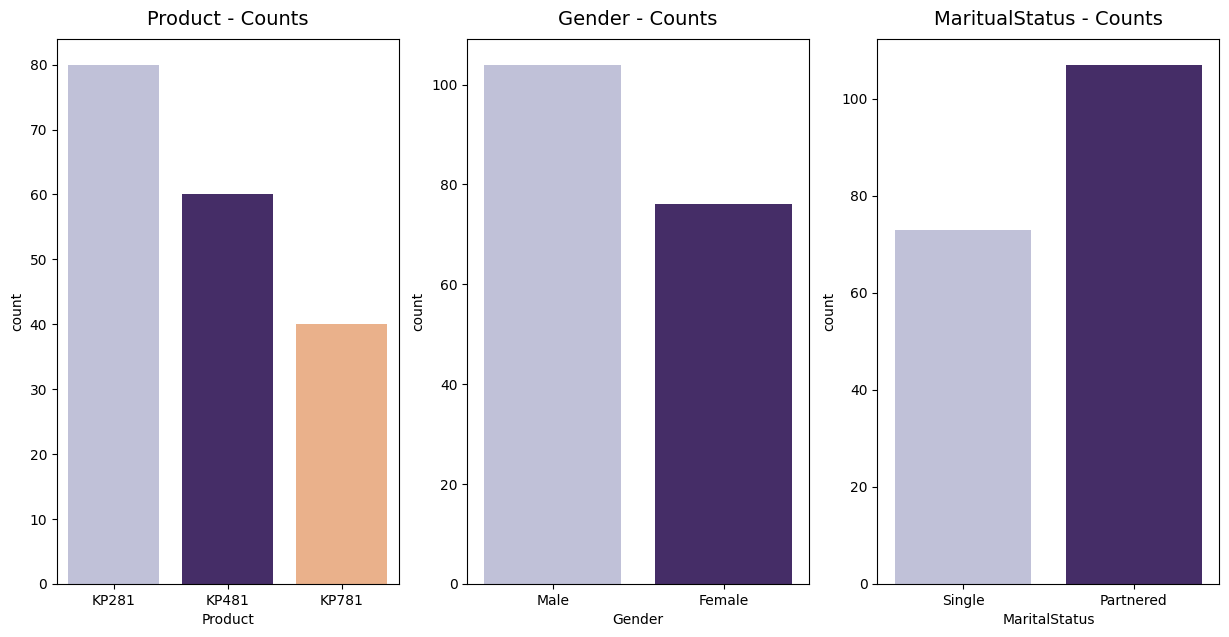

In [16]:
fig , axis = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
fig.subplots_adjust(top=1.2)

sns.countplot(data=df, x='Product', ax=axis[0],  palette=["#bcbddc",'#432371',"#FAAE7B"])
sns.countplot(data=df, x='Gender', ax=axis[1],  palette=["#bcbddc",'#432371'])
sns.countplot(data=df, x='MaritalStatus', ax=axis[2],  palette=["#bcbddc",'#432371'])

axis[0].set_title("Product - Counts", pad=10, fontsize=14)
axis[1].set_title("Gender - Counts", pad=10, fontsize=14)
axis[2].set_title("MaritualStatus - Counts", pad=10, fontsize=14)
plt.show()

```
Observations
1. KP281 is the most frequent product(cheapest and entry level treadmill).
2. There are more Males in the data than Females.
3. More Partnered persons are there in the data.
```



Recommendation:
1. Since most of the customers are  partnered but count of female is lower than male, we should promote our products by giving demos and explaining the importance of fitness; Especially  for Females.

In [17]:
df1=df[['Product','Gender','MaritalStatus']].melt()
df1

,variable,value
0,Product,KP281
1,Product,KP281
2,Product,KP281
3,Product,KP281
4,Product,KP281
...,...,...
535,MaritalStatus,Single
536,MaritalStatus,Single
537,MaritalStatus,Single
538,MaritalStatus,Partnered


In [18]:
df1.groupby(['variable', 'value'])[['value']].count() * 100/ len(df)

value
variable      value               
Gender        Female     42.222222
              Male       57.777778
MaritalStatus Partnered  59.444444
              Single     40.555556
Product       KP281      44.444444
              KP481      33.333333
              KP781      22.222222



```
Observations
* Product
1. 44.44% of the customers have purchased KP2821 product.
2. 33.33% of the customers have purchased KP481 product.
3. 22.22% of the customers have purchased KP781 product.
* Gender
1. 57.78% of the customers are Male.
* MaritalStatus
1. 59.44% of the customers are Partnered.
```



**3. Check if features like marital status, Gender, and age have any effect on the product
purchased**



```
Bivariate Analysis:
Checking if features - Gender or MaritalStatus have any effect on the product purchased.
```



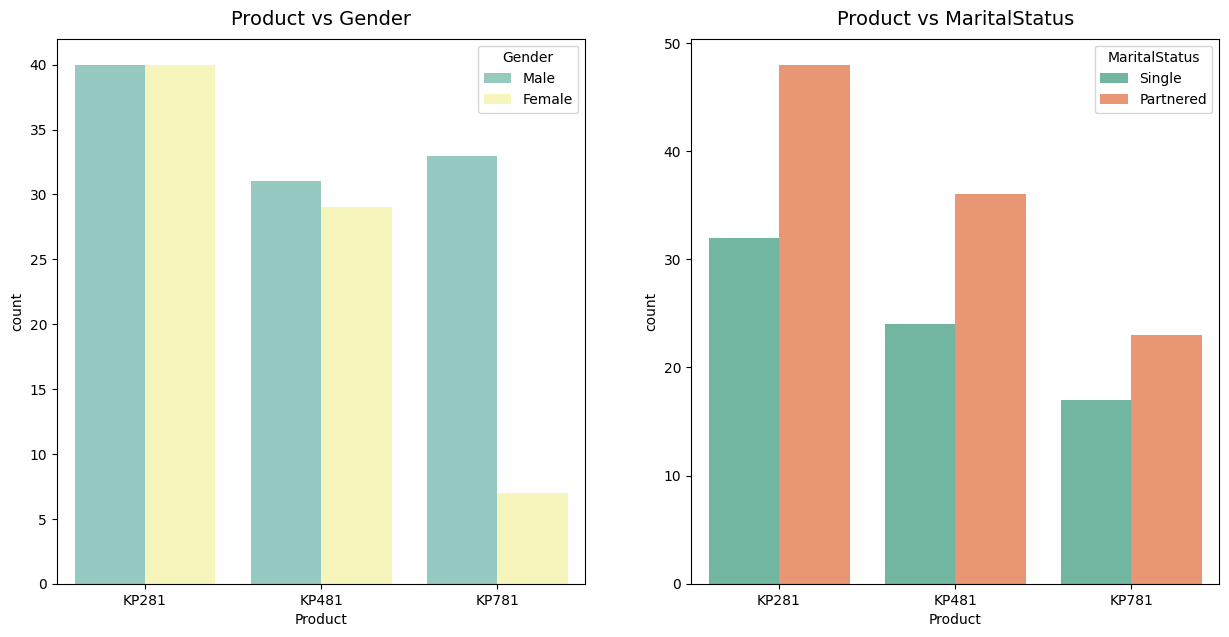

In [19]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.subplots_adjust(top=1.2)

sns.countplot(data=df, x='Product', hue='Gender', ax=axs[0], palette='Set3')
axs[0].set_title("Product vs Gender", pad=10, fontsize=14)

sns.countplot(data=df, x='Product', hue='MaritalStatus', ax=axs[1], palette='Set2')
axs[1].set_title("Product vs MaritalStatus", pad=10, fontsize=14)

plt.show()



```
Observations:

 Product vs Gender
1. Equal number of males and females have purchased KP281 product and Almost same for the product KP481
2. Most of the Male customers have purchased the KP781 product.

 Product vs MaritalStatus
1. Customer who is Partnered, is more likely to purchase the product.
```



**Checking if following features have any effect on the product purchased:**
1. Age
2. Education
3. Usage
4. Fitness
5. Income
6. Miles

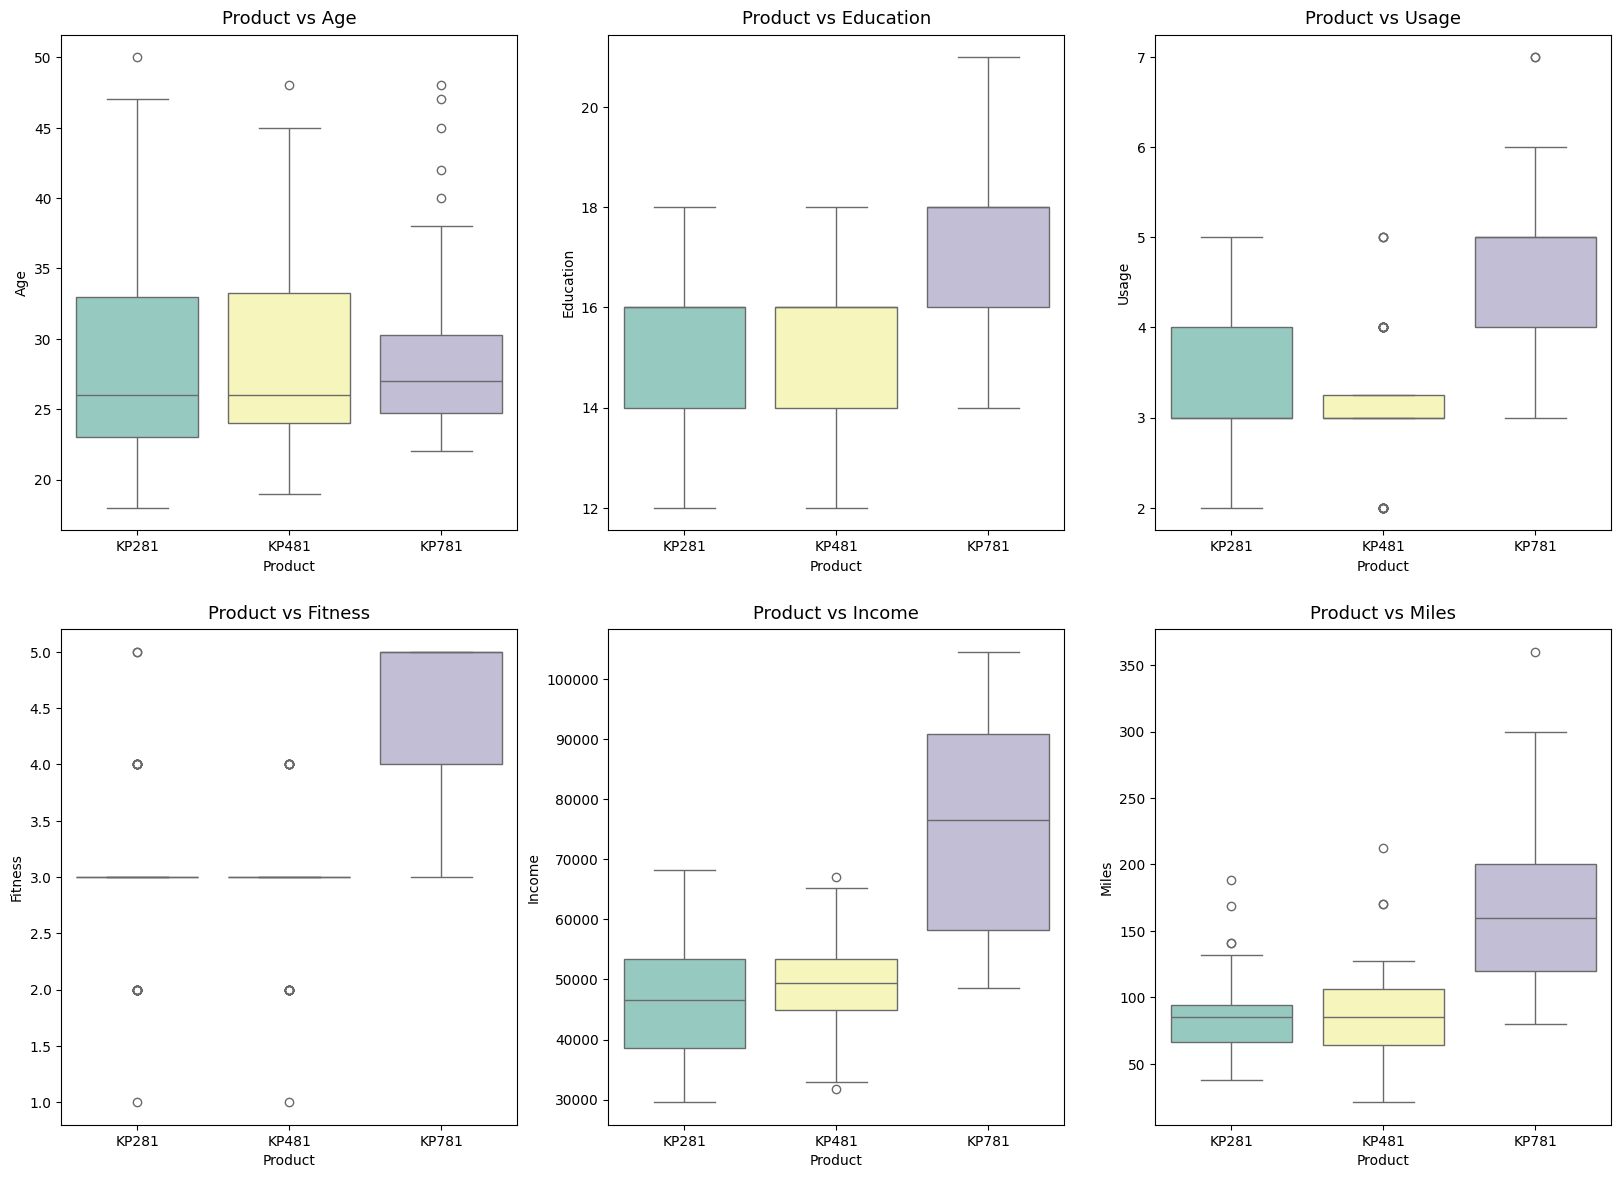

In [20]:
feature=['Age','Education','Usage','Fitness','Income','Miles']
index=0

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
fig.subplots_adjust(top=1.2)

for i in range(2):
  for j in range(3):
    sns.boxplot(data=df, x='Product', y=feature[index], ax=axs[i,j], palette='Set3')
    axs[i,j].set_title(f"Product vs {feature[index]}",  pad=8, fontsize=13 )
    index+=1
plt.show()



```
Observations :
 Product vs Age
1. Customers purchasing products KP281 & KP481 are having same Age median value.
2. Customers whose age lies between 25-30, are more likely to buy KP781 product

 Product vs Education
1. Customers whose Education is greater than 16, have more chances to purchase the KP781 product.
2. While the customers with Education less than 16 have equal chances of purchasing KP281 or KP481.

 Product vs Usage
1. Customers who are planning to use the treadmill greater than 4 times a week, are more likely to purchase the KP781 product.
2. While the other customers are likely to purchasing KP281 or KP481.

 Product vs Fitness
1. The more the customer is fit (fitness >= 3), higher the chances of the customer to purchase the KP781 product.

 Product vs Income
1. Higher the Income of the customer (Income >= 60000), higher the chances of the customer to purchase the KP781 product.

 Product vs Miles
1. If the customer expects to walk/run greater than 120 Miles per week, it is more likely that the customer will buy KP781 product.
```



**Multi-variate Analysis**

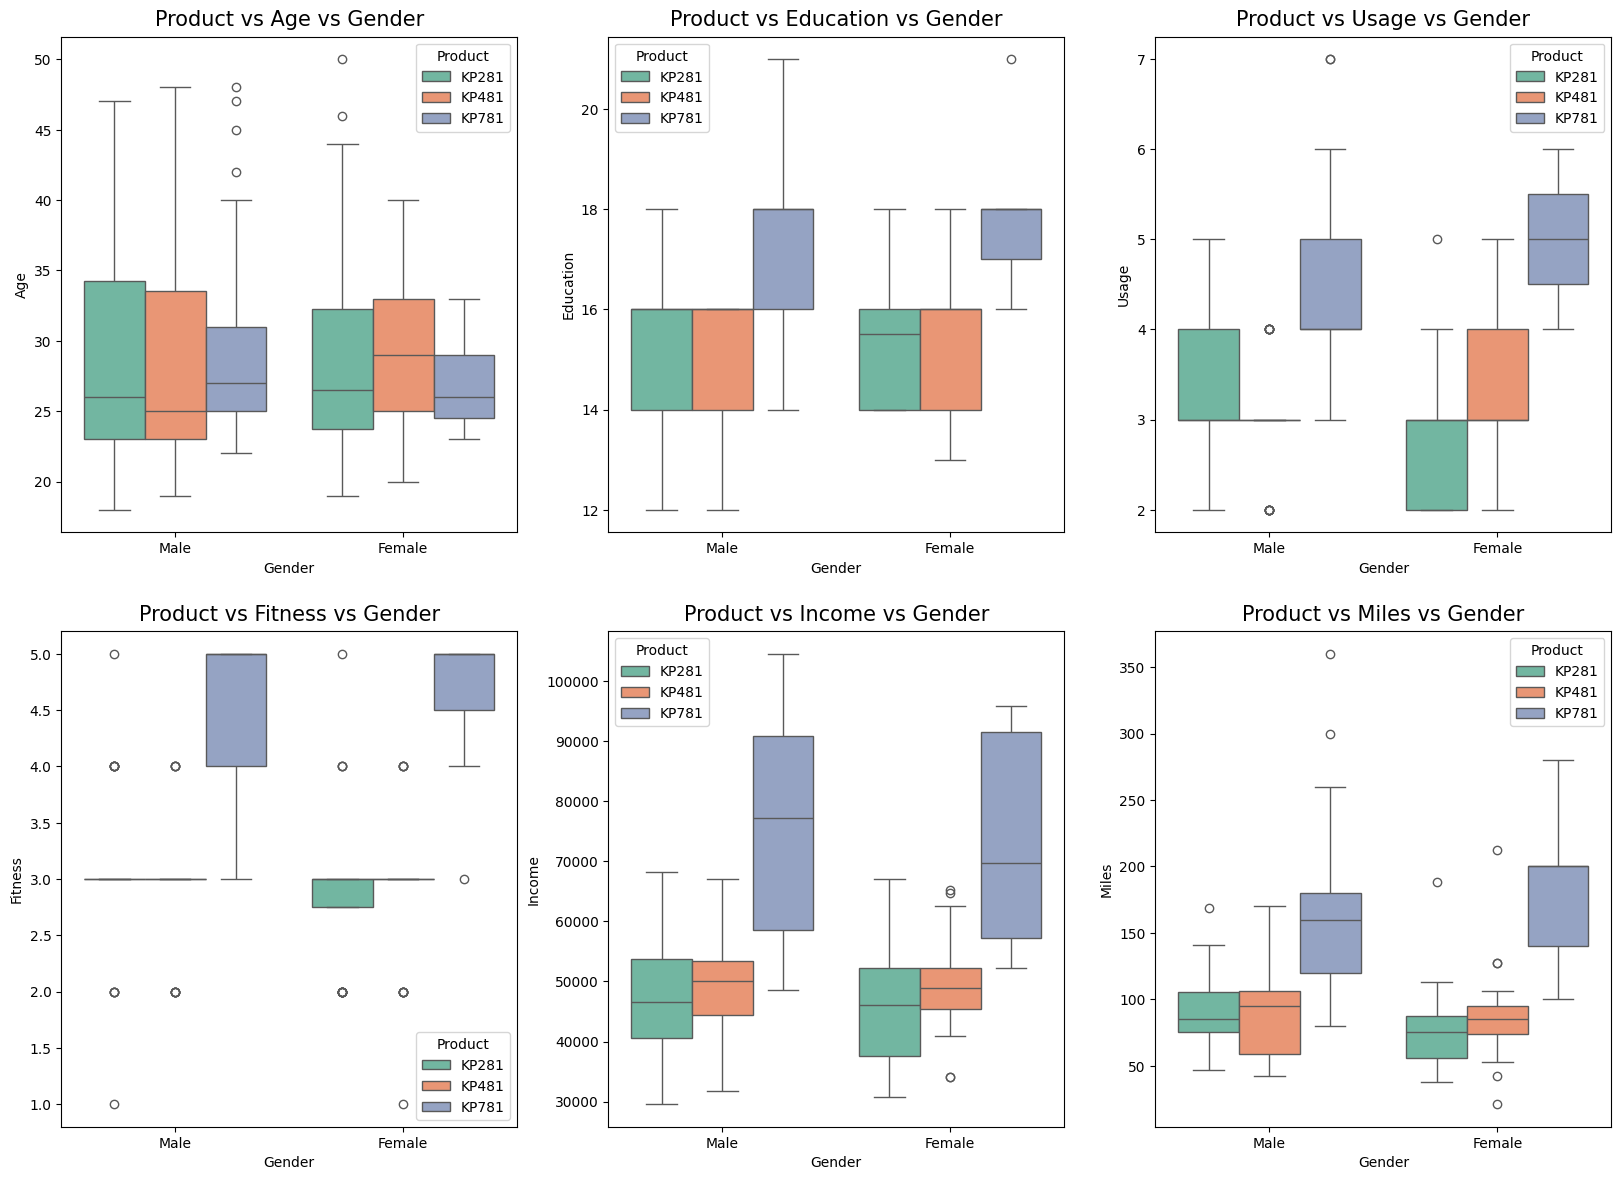

In [21]:
feature=['Age','Education','Usage','Fitness','Income','Miles']
index=0

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
fig.subplots_adjust(top=1.2)

for i in range(2):
  for j in range(3):
    sns.boxplot(data=df, x='Gender', y=feature[index],  hue='Product', ax=axs[i,j], palette='Set2')
    axs[i,j].set_title(f"Product vs {feature[index]} vs Gender",  pad=8, fontsize=15 )
    index+=1
plt.show()



```
Observations
1. Females planning to use treadmill 3-4 times a week, are more likely to buy KP481 product
2. KP781 product for sure have best fitness self-rated fitness on a 1-to-5 scale, where 1 is poor shape and 5 is the excellent shape.
```



**4. Representing the Probability**

Marginal Probability:

In [22]:
df['Product'].value_counts(normalize=True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

Conditional Probability:

In [23]:
df1=pd.crosstab(index=df['Gender'], columns=df['Product'])
df1

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


In [24]:
def prob_product_given_gender(gender, print_marginal_prob=False):
  if gender not in ['Male','Female']:
    return 'Invalid gender input!'

  df1=pd.crosstab(index=df['Gender'], columns=df['Product'])
  kp781=df1['KP781'][gender].sum()*100/df1.loc[gender].sum()
  kp481=df1['KP481'][gender].sum()*100/df1.loc[gender].sum()
  kp281=df1['KP281'][gender].sum()*100/df1.loc[gender].sum()

  if print_marginal_prob:
    print(f"P(Male)   : {df1.loc['Male'].sum()*100/df.shape[0]:.2f}%")
    print(f"P(Female) : {df1.loc['Female'].sum()*100/df.shape[0]:.2f}%\n")

  print(f'KP781|{gender} : {kp781:.2f}%')
  print(f'KP481|{gender} : {kp481:.2f}%')
  print(f'KP281|{gender} : {kp281:.2f}%\n')

prob_product_given_gender('Male', print_marginal_prob=True)
prob_product_given_gender('Female', print_marginal_prob=False)

P(Male)   : 57.78%
P(Female) : 42.22%

KP781|Male : 31.73%
KP481|Male : 29.81%
KP281|Male : 38.46%

KP781|Female : 9.21%
KP481|Female : 38.16%
KP281|Female : 52.63%



**5. Check the correlation among different factors**

<Axes: >

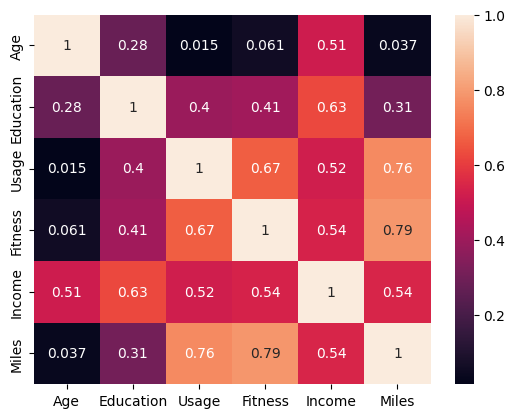

In [25]:
sns.heatmap(data=df[['Age','Education','Usage','Fitness','Income','Miles']].corr(), annot=True)



```
Observation :
1. Income and Education has fix impact on buying a specific product.
```



**6. Customer profiling and recommendation**

Product: KP281
Product: KP481
Product: KP781


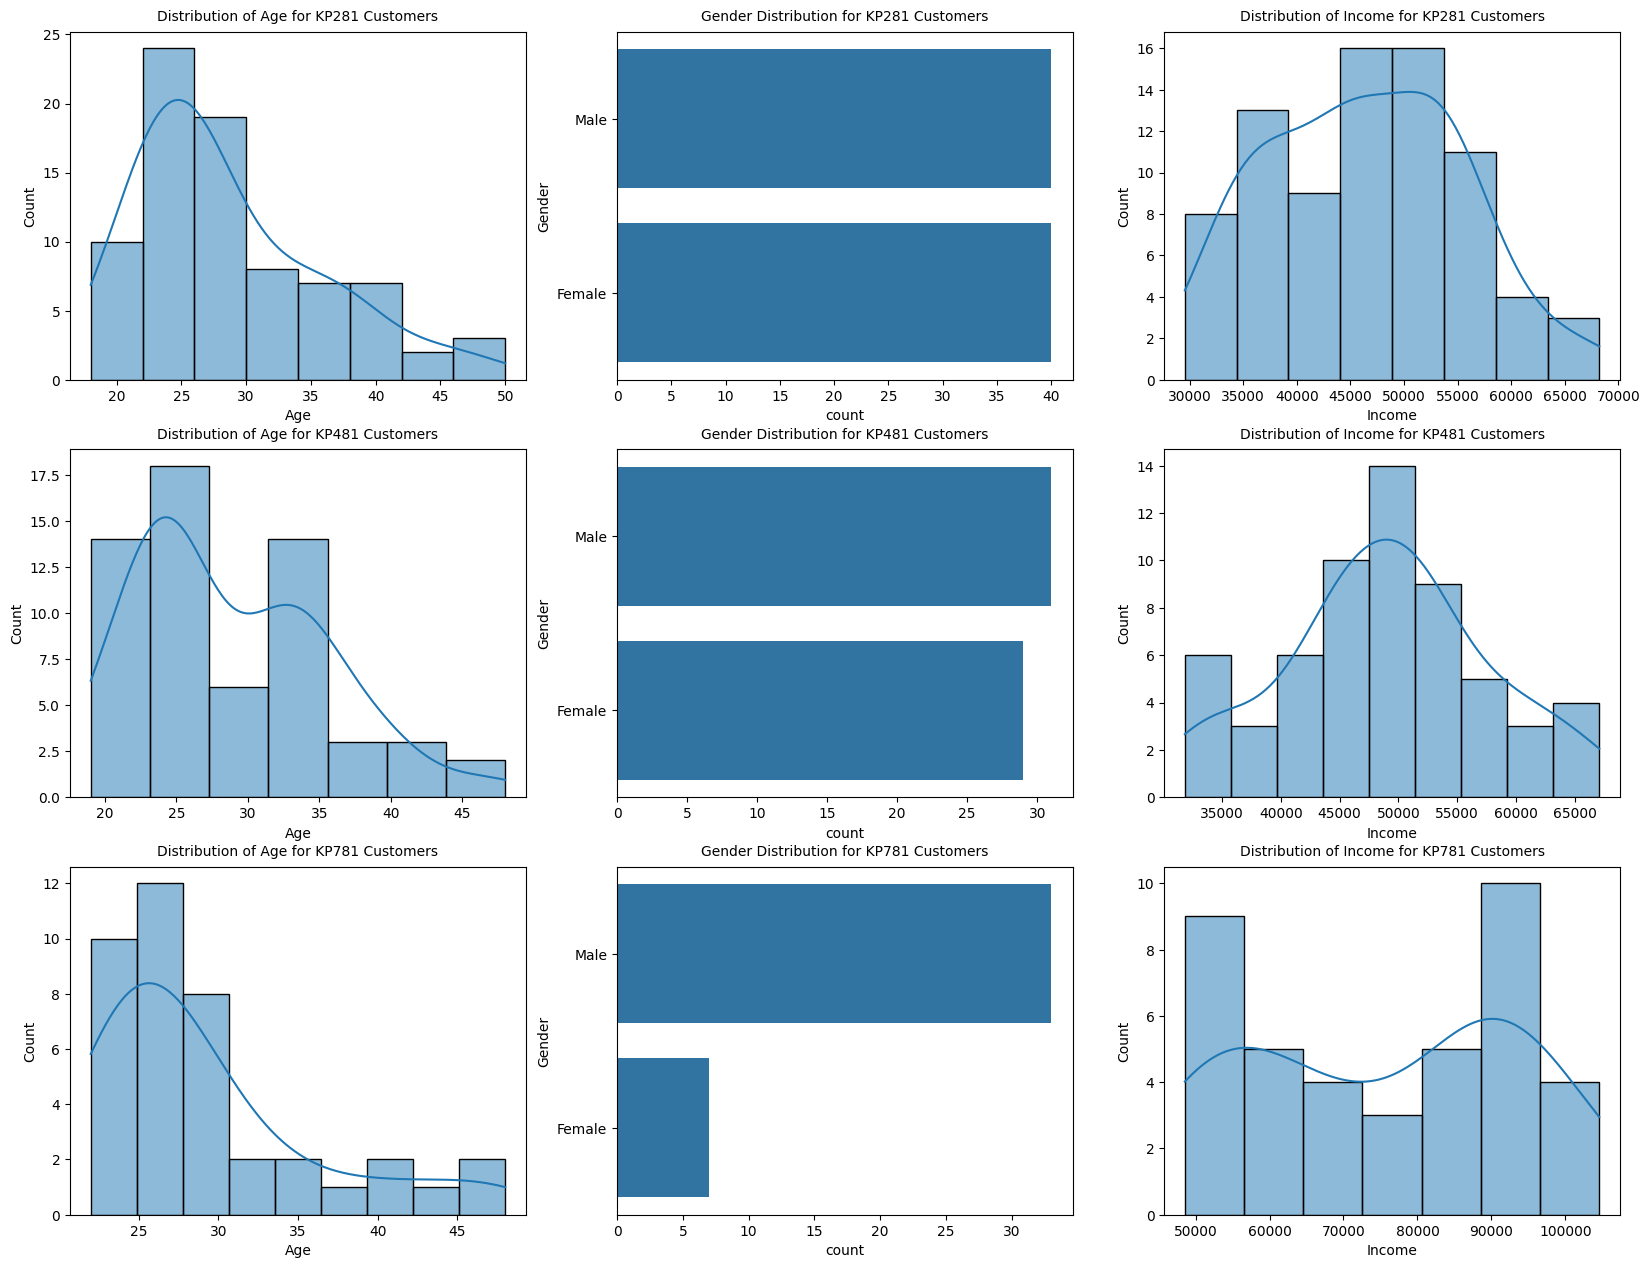

In [26]:
grouped_data = df.groupby('Product')

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20,7))
fig.subplots_adjust(top=1.8)
index=0

for product, group in grouped_data:
    print("Product:", product)

    # Analyze Age
    # plt.figure(figsize=(10, 6))
    sns.histplot(group['Age'],  kde=True, ax=axs[index,0])
    axs[index,0].set_title('Distribution of Age for {} Customers'.format(product), fontsize=10, pad=8)
    # plt.xlabel('Age')
    # plt.ylabel('Count')
    # plt.show()

    # Analyze Gender
    # plt.figure(figsize=(6, 4))
    sns.countplot(group['Gender'], ax=axs[index,1])
    axs[index,1].set_title('Gender Distribution for {} Customers'.format(product), fontsize=10, pad=8)
    # plt.xlabel('Gender')
    # plt.ylabel('Count')
    # plt.show()

    # Analyze Income
    # plt.figure(figsize=(10, 6))
    sns.histplot(group['Income'],  kde=True, ax=axs[index,2])
    axs[index,2].set_title('Distribution of Income for {} Customers'.format(product), fontsize=10, pad=8)
    # plt.xlabel('Income')
    # plt.ylabel('Count')
    # plt.show()
    index+=1

plt.show()




```
Observations
1. Most of the customers are of age group of 22-28 years.
2. Male is suppose to be of higher count for all kinds of products.
3. Customer with income range between 50000 to 55000 range have high purchase rate.
```



KP281 pdf values:  [0.125  0.2125 0.2125 0.1375 0.075  0.0875 0.075  0.025  0.025  0.025 ]
KP281 bins values:  [18.  21.2 24.4 27.6 30.8 34.  37.2 40.4 43.6 46.8 50. ]
KP481 pdf values:  [0.11666667 0.16666667 0.25       0.05       0.16666667 0.11666667
 0.05       0.05       0.01666667 0.01666667]
KP481 bins values:  [19.  21.9 24.8 27.7 30.6 33.5 36.4 39.3 42.2 45.1 48. ]
KP781 pdf values:  [0.25  0.3   0.125 0.1   0.05  0.025 0.05  0.025 0.025 0.05 ]
KP781 bins values:  [22.  24.6 27.2 29.8 32.4 35.  37.6 40.2 42.8 45.4 48. ]
KP281 pdf values:  [0.075  0.125  0.1375 0.0875 0.15   0.1625 0.1375 0.075  0.0125 0.0375]
KP281 bins values:  [29562.  33427.8 37293.6 41159.4 45025.2 48891.  52756.8 56622.6 60488.4
 64354.2 68220. ]
KP481 pdf values:  [0.1        0.05       0.03333333 0.21666667 0.1        0.2
 0.1        0.08333333 0.05       0.06666667]
KP481 bins values:  [31836.  35360.7 38885.4 42410.1 45934.8 49459.5 52984.2 56508.9 60033.6
 63558.3 67083. ]
KP781 pdf values:  [0.2   0

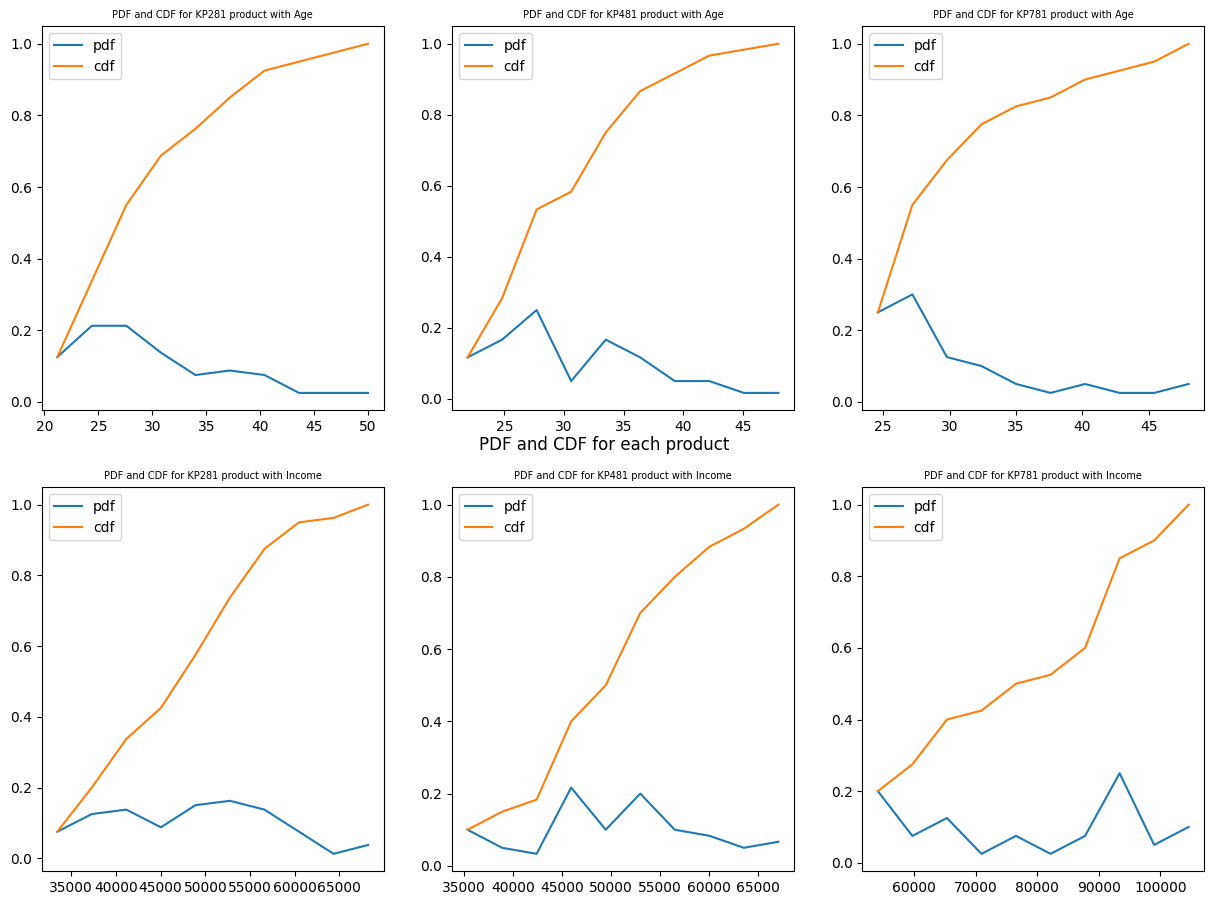

In [40]:
fig=plt.figure(figsize=(15,5))
fig.subplots_adjust(top=1.8)
index=1
l=['KP281',	'KP481',	'KP781']
p=['Age',  'Income']
for feature in p:

  for i in range(3):
      plt.subplot(len(p),3,index)
      plt.title(f'PDF and CDF for {l[i]} product with {feature}', fontsize=7)
      counts, bin_edges = np.histogram(df[df['Product']==f'{l[i]}'][feature], bins=10, density=True)
      pdf=counts/sum(counts)

      print(f'{l[i]} pdf values: ',pdf)
      print(f'{l[i]} bins values: ',bin_edges)

      cdf=np.cumsum(pdf)
      plt.plot(bin_edges[1:], pdf)
      plt.plot(bin_edges[1:], cdf)
      plt.legend(['pdf','cdf'], loc='upper left')
      index+=1
fig.suptitle('PDF and CDF for each product')
plt.show()



```
Observation :
1. Customer with inccome 55000 yrs and age beween 22-27 have high chances of buying product KP281.
2. Customer with inccome 45000 yrs and age beween 22-27 have high chances of buying product KP281.
3. Customer with inccome 95000 yrs and age beween 25-27 have high chances of buying product KP281.
```

